# Funciones de distribución de probabilidades

## Distribución Unifirme

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
a = 1
b = 100
n = 1000000
data = np.random.uniform(a,b,n)##Número de muestras "n"

(array([ 99725., 100306.,  99567., 100186.,  99842.,  99894., 100066.,
        100392.,  99808., 100214.]),
 array([ 1.00003667, 10.90000177, 20.79996686, 30.69993195, 40.59989705,
        50.49986214, 60.39982723, 70.29979233, 80.19975742, 90.09972251,
        99.99968761]),
 <a list of 10 Patch objects>)

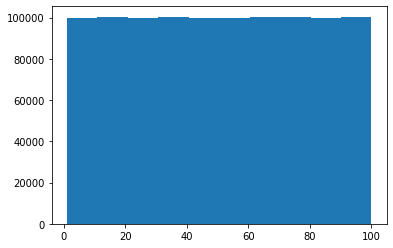

In [5]:
%matplotlib inline
plt.hist(data)

## Distribución normal- Campana de Gauss

In [8]:
data = np.random.randn(1000000)

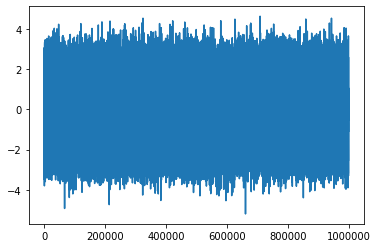

In [9]:
x = range(1,1000001)
plt.plot(x, data) ##Data es la altura del onjunto de datos

(array([1.20000e+01, 6.30000e+02, 1.14810e+04, 9.07660e+04, 2.86379e+05,
        3.69933e+05, 1.95059e+05, 4.19120e+04, 3.69700e+03, 1.31000e+02]),
 array([-5.20307667, -4.21878195, -3.23448723, -2.25019251, -1.26589779,
        -0.28160307,  0.70269165,  1.68698637,  2.67128109,  3.65557581,
         4.63987053]),
 <a list of 10 Patch objects>)

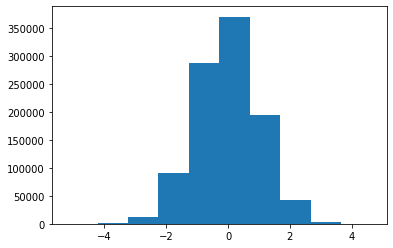

In [10]:
plt.hist(data)

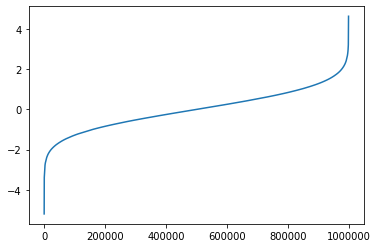

In [11]:
plt.plot(x,sorted(data))##Función de distribución acumulada

(array([2.000e+00, 2.900e+01, 2.520e+02, 1.077e+03, 2.502e+03, 3.184e+03,
        2.149e+03, 6.600e+02, 1.340e+02, 1.100e+01]),
 array([-5.29791083, -3.27442445, -1.25093806,  0.77254832,  2.79603471,
         4.81952109,  6.84300748,  8.86649386, 10.88998024, 12.91346663,
        14.93695301]),
 <a list of 10 Patch objects>)

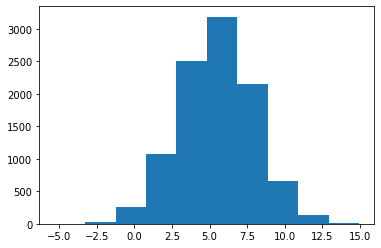

In [12]:
mu = 5.5 #Media
sd = 2.5 #Desviación Estandar
z = np.random.randn(10000)
data = mu + sd*z# z = (X - mu)/sd -> N(0,1), X = mu + sd * z
plt.hist(data)

In [13]:
data = np.random.randn(2,4)
data

array([[ 0.7050617 , -2.41608558,  0.28301853,  0.11494721],
       [ 0.70684085,  0.23103128,  1.24780882, -1.51135998]])

## La simulaciónn de Monte Carlo

* Generamos dos números aleatorios uniforme X e Y entre 0 y 1 en total 1000 veces
* Calcularemos x² + y²
     * Si el valor es inferior a 1 -> estamos dentro del círculo
     * Si el valor es superior a 1 -> estamos fuera del cúrculo
* Calculamos el número total de veces que están dentro del círiculo y lo dividimos entre el número total de intentos para obtener una aproximación de caer dentro del cŕculo.
* Usamos diche probabilidad para aproximar el valor de pi
* Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (100) diferentes aproximacines de pi.
* Calculamos el promedio de los (100) experimentos anteriores para dar un valor final de pi.

In [14]:
def pi_montecarlo(n, n_expe): #n = Número de puntos
    pi_avg = 0
    pi_value_list = []
    for i in range(n_expe):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_expe

    print(pi)
    fig = plt.plot(pi_value_list)
    return fig

3.139304000000002


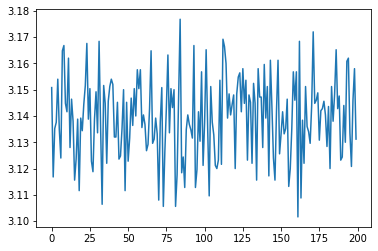

In [15]:
pi_montecarlo(10000,200)

## Dummy Data Sets

In [20]:
n = 100000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n),
        'B' : 1.5 +2.5 * np.random.randn(n),
        'C' : np.random.uniform(5,32,n)# mínimo 5 y máx 32
    }
)

In [21]:
data.describe()

,A,B,C
count,100000.000000,100000.000000,100000.000000
mean,0.003986,1.508472,18.534943
std,1.001569,2.503317,7.795332
min,-4.441094,-8.888994,5.000221
25%,-0.666596,-0.173235,11.786822
50%,0.002220,1.502165,18.555650
75%,0.680304,3.192174,25.290418
max,4.520487,13.678795,31.999977


(array([1.9000e+01, 3.9900e+02, 3.5820e+03, 1.5294e+04, 3.2215e+04,
        3.0816e+04, 1.4252e+04, 3.1200e+03, 2.9500e+02, 8.0000e+00]),
 array([-4.44109442, -3.54493626, -2.6487781 , -1.75261994, -0.85646178,
         0.03969638,  0.93585454,  1.8320127 ,  2.72817085,  3.62432901,
         4.52048717]),
 <a list of 10 Patch objects>)

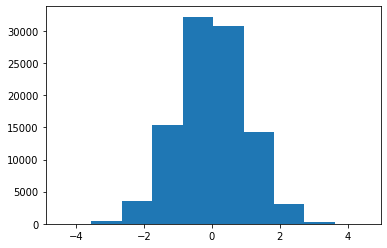

In [22]:
plt.hist(data["A"])

(array([4.6000e+01, 9.1300e+02, 6.4560e+03, 2.1703e+04, 3.4890e+04,
        2.5474e+04, 9.0000e+03, 1.4090e+03, 1.0300e+02, 6.0000e+00]),
 array([-8.88899401, -6.63221513, -4.37543625, -2.11865736,  0.13812152,
         2.3949004 ,  4.65167929,  6.90845817,  9.16523705, 11.42201593,
        13.67879482]),
 <a list of 10 Patch objects>)

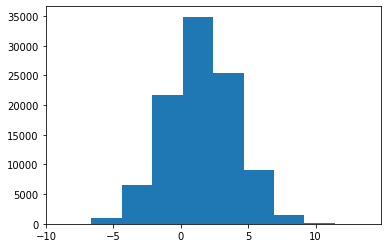

In [23]:
plt.hist(data["B"])

(array([ 9915., 10053.,  9918.,  9975.,  9966.,  9894., 10059., 10111.,
        10060., 10049.]),
 array([ 5.00022087,  7.70019653, 10.40017218, 13.10014783, 15.80012349,
        18.50009914, 21.2000748 , 23.90005045, 26.6000261 , 29.30000176,
        31.99997741]),
 <a list of 10 Patch objects>)

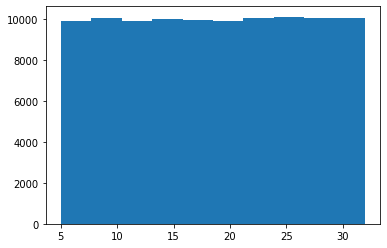

In [24]:
plt.hist(data["C"])

In [25]:
data = pd.read_csv("datasets/customer-churn-model/Customer Churn Model.txt")

In [26]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [27]:
colum_names = data.columns.values.tolist()

In [28]:
a = len(colum_names)
a

21

In [29]:
new_data = pd.DataFrame(
    {
        'Column Name': colum_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0,1,a)
    }, index = range(42, 42 +a)
)

In [94]:
new_data

,Column Name,A,B
42,State,-0.171499,0.404037
43,Account Length,1.533093,0.911643
44,Area Code,-0.427456,0.417208
45,Phone,0.233992,0.671509
46,Int'l Plan,0.661059,0.342135
47,VMail Plan,0.083784,0.907040
48,VMail Message,-0.789855,0.171843
49,Day Mins,2.002069,0.349344
50,Day Calls,-0.393262,0.212731
51,Day Charge,-0.204496,0.025989
